In [2]:
!pip install deep_xf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 17.2 MB/s 
     |████████████████████████████████| 356 kB 54.4 MB/s 
     |████████████████████████████████| 208 kB 45.3 MB/s 
     |████████████████████████████████| 554 kB 61.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491693 sha256=de75b02640d8139cc93a78b31100c4370e5375ef7b8faefae265c03070ca9fb5
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43818 sha256=260e5a6be0ba6dc6cabc2422148defe338a4b8ca83f7cdbaa09fa09a6328bd02
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-

In [3]:
from deep_xf.stats import * # expectation-maximization factor model
from deep_xf.dpp import * # data preprocessing
from deep_xf.utility import * # helper functions
from deep_xf.main import * # main wrapper functions call



Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

In [10]:
from google.colab import files
data_to_load = files.upload()
import io

df = pd.read_csv(io.BytesIO(data_to_load['nowdf.csv']))
df.shape
df.info()

Saving nowdf.csv to nowdf (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      273 non-null    object 
 1   Private equity            273 non-null    float64
 2   Private equity returns    273 non-null    float64
 3   MSCI PRICE                273 non-null    float64
 4   MSCI TOTAL RETURN         273 non-null    float64
 5   MSCI TOTAL RETURN.1       273 non-null    float64
 6   gold                      273 non-null    float64
 7   LEV LOANS INDEX           212 non-null    float64
 8   CORPORATE BONDS TR        213 non-null    float64
 9   REITs GLOBAL TR           143 non-null    float64
 10  Fama French Market        273 non-null    float64
 11  Fama French Size          273 non-null    float64
 12  Fama French Value         273 non-null    float64
 13  Fama French Robust        273 n

In [11]:
df.head(4)

,Date,Private equity,Private equity returns,MSCI PRICE,MSCI TOTAL RETURN,MSCI TOTAL RETURN.1,gold,LEV LOANS INDEX,CORPORATE BONDS TR,REITs GLOBAL TR,Fama French Market,Fama French Size,Fama French Value,Fama French Robust,Fama French Conservative,Risk free
0,1989-12-31,171.190000,0.015423,379.41,762.584,1205.700,401.00,NaN,NaN,NaN,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000
1,1990-01-31,171.383333,0.001129,353.94,713.133,1149.589,412.75,NaN,NaN,NaN,92.150000,98.68000,100.85000,98.820000,101.370000,100.570000
2,1990-02-28,171.576667,0.001127,358.50,723.758,1100.482,407.50,NaN,NaN,NaN,93.172865,99.81482,101.49544,98.750826,100.751643,101.143249
3,1990-04-30,173.956667,0.012650,358.81,725.864,1019.493,367.75,NaN,NaN,NaN,91.690030,101.06744,95.97980,102.569088,98.796557,102.492921


In [12]:
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row Date                          0
Private equity                0
Private equity returns        0
MSCI PRICE                    0
MSCI TOTAL RETURN             0
MSCI TOTAL RETURN.1           0
gold                          0
LEV LOANS INDEX              61
CORPORATE BONDS TR           60
REITs GLOBAL TR             130
Fama French Market            0
Fama French Size              0
Fama French Value             0
Fama French Robust            0
Fama French Conservative      0
Risk free                     0
dtype: int64
Missing by col 0      3
1      3
2      3
3      3
4      3
      ..
268    0
269    0
270    0
271    0
272    0
Length: 273, dtype: int64


In [13]:
df_no_missing = Preprocessing.impute(df=df, modes=1)

In [14]:
# recheck missing values
print("Missing information for whole dataset")
print("Missing by row", df_no_missing.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df_no_missing.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row Date                        0
Private equity              0
Private equity returns      0
MSCI PRICE                  0
MSCI TOTAL RETURN           0
MSCI TOTAL RETURN.1         0
gold                        0
LEV LOANS INDEX             0
CORPORATE BONDS TR          0
REITs GLOBAL TR             0
Fama French Market          0
Fama French Size            0
Fama French Value           0
Fama French Robust          0
Fama French Conservative    0
Risk free                   0
dtype: int64
Missing by col 0      0
1      0
2      0
3      0
4      0
      ..
268    0
269    0
270    0
271    0
272    0
Length: 273, dtype: int64


In [32]:
# set nowcasting model parameters
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='em', select_user_path='./NOWCAST_MY/', select_scaler='minmax', forecast_window=6)

select_model = em
select_user_path = ./NOWCAST_MY/
select_scaler = minmax
forecast_window = 6


In [17]:
df_no_missing.columns

Index(['Date', 'Private equity', 'Private equity returns', 'MSCI PRICE',
       'MSCI TOTAL RETURN', 'MSCI TOTAL RETURN.1', 'gold', 'LEV LOANS INDEX',
       'CORPORATE BONDS TR', 'REITs GLOBAL TR', 'Fama French Market',
       'Fama French Size', 'Fama French Value', 'Fama French Robust',
       'Fama French Conservative', 'Risk free'],
      dtype='object')

In [18]:
# set variables
ts, fc = Forecast.set_variable(ts='Date', fc='Private equity returns')

ts = Date
fc = Private equity returns


In [19]:
# get variables
model_df, orig_df = Helper.get_variable(df_no_missing, ts, fc)

In [20]:
model_df.tail(1)

,Private equity,value,MSCI PRICE,MSCI TOTAL RETURN,MSCI TOTAL RETURN.1,gold,LEV LOANS INDEX,CORPORATE BONDS TR,REITs GLOBAL TR,Fama French Market,Fama French Size,Fama French Value,Fama French Robust,Fama French Conservative,Risk free
Date,,,,,,,,,,,,,,,
2021-09-30,21985.47,0.016372,8994.83,19038.351,13186.527,1760.95,3290.974,389.473,3211.42,1124.101856,150.937798,119.516238,316.265358,182.176743,224.334587


In [21]:
ExploratoryDataAnalysis.plot_dataset(df=model_df,fc=fc, title='Private equity returns')

In [33]:
nowcast_full_data, nowcast_pred_data = EMModel.nowcast(model_df, ts, fc, period=6, fq='1m', forecast_window=forecast_window, select_model=select_model)

                         Model Specification: Dynamic Factor Model                         
Model:                Dynamic Factor Model   # of observed variables:                    15
                   + 1 factors in 1 blocks   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                                  0   Standardize variables:                    True
                                     - 273                                                 
Observed variables / factor loadings
           Dep. variable          0
-----------------------------------
          Private equity          X
                   value          X
              MSCI PRICE          X
       MSCI TOTAL RETURN          X
     MSCI TOTAL RETURN.1          X
                    gold          X
         LEV LOANS INDEX          X
      CORPORATE BONDS TR          X
         REITs GLOBAL TR          X
      Fama Fren

In [34]:
nowcast_full_data.tail(10)

,Private equity,Private equity returns,MSCI PRICE,MSCI TOTAL RETURN,MSCI TOTAL RETURN.1,gold,LEV LOANS INDEX,CORPORATE BONDS TR,REITs GLOBAL TR,Fama French Market,Fama French Size,Fama French Value,Fama French Robust,Fama French Conservative,Risk free
Date,,,,,,,,,,,,,,,
2021-05-31,20157.776667,0.038259,8738.770000,18447.077000,12976.578000,1905.990000,3241.861000,384.654000,3243.330000,1098.159616,157.787606,125.579220,313.654994,184.324211,224.334587
2021-06-30,20914.430000,0.036849,8942.780000,18960.673000,13174.251000,1765.430000,3254.939000,389.392000,3258.340000,1128.798270,157.393137,115.834273,306.942777,182.499402,224.334587
2021-08-31,21628.456667,0.016644,9433.580000,19981.807000,13751.461000,1806.300000,3269.963000,393.306000,3398.480000,1175.469890,149.074368,113.727508,322.489404,178.464677,224.334587
2021-09-30,21985.470000,0.016372,8994.830000,19038.351000,13186.527000,1760.950000,3290.974000,389.473000,3211.420000,1124.101856,150.937798,119.516238,316.265358,182.176743,224.334587
2021-10-31,22759.779251,0.015627,9158.593682,19398.155654,13374.214554,1757.439516,3288.044710,389.128254,3188.754986,1143.382205,150.614713,119.932246,315.771655,182.066593,224.114611
2021-11-30,23572.504444,0.015061,9327.284651,19769.078509,13566.810182,1753.942518,3285.124301,388.784562,3166.547741,1163.224103,150.296750,120.343219,315.280174,181.957085,223.895726
2021-12-31,24425.521101,0.014633,9501.045843,20151.451450,13764.436082,1750.458950,3282.212736,388.441920,3144.788892,1183.643328,149.983820,120.749215,314.790904,181.848214,223.677925
2022-01-31,25320.796466,0.014307,9680.024367,20545.616330,13967.217527,1746.988757,3279.309979,388.100323,3123.469260,1204.656103,149.675836,121.150293,314.303837,181.739978,223.461205
2022-02-28,26260.393986,0.014060,9864.371626,20951.925263,14175.282939,1743.531885,3276.415994,387.759767,3102.579856,1226.279110,149.372712,121.546512,313.818962,181.632373,223.245558


In [35]:
nowcast_pred_data.head()

,Private equity,value,MSCI PRICE,MSCI TOTAL RETURN,MSCI TOTAL RETURN.1,gold,LEV LOANS INDEX,CORPORATE BONDS TR,REITs GLOBAL TR,Fama French Market,Fama French Size,Fama French Value,Fama French Robust,Fama French Conservative,Risk free
Date,,,,,,,,,,,,,,,
2021-10-31,22759.779251,0.015627,9158.593682,19398.155654,13374.214554,1757.439516,3288.044710,389.128254,3188.754986,1143.382205,150.614713,119.932246,315.771655,182.066593,224.114611
2021-11-30,23572.504444,0.015061,9327.284651,19769.078509,13566.810182,1753.942518,3285.124301,388.784562,3166.547741,1163.224103,150.296750,120.343219,315.280174,181.957085,223.895726
2021-12-31,24425.521101,0.014633,9501.045843,20151.451450,13764.436082,1750.458950,3282.212736,388.441920,3144.788892,1183.643328,149.983820,120.749215,314.790904,181.848214,223.677925
2022-01-31,25320.796466,0.014307,9680.024367,20545.616330,13967.217527,1746.988757,3279.309979,388.100323,3123.469260,1204.656103,149.675836,121.150293,314.303837,181.739978,223.461205
2022-02-28,26260.393986,0.014060,9864.371626,20951.925263,14175.282939,1743.531885,3276.415994,387.759767,3102.579856,1226.279110,149.372712,121.546512,313.818962,181.632373,223.245558


In [36]:
nowcast_pred_data[['value']]

,value
Date,
2021-10-31,0.015627
2021-11-30,0.015061
2021-12-31,0.014633
2022-01-31,0.014307
2022-02-28,0.014060
2022-03-31,0.013873


In [37]:
model_df.shape

(273, 15)

In [38]:
nowcast_full_data.shape  

(279, 15)

In [41]:
colnum = nowcast_full_data.shape[1]
rownum = nowcast_full_data.shape[0]

279

Epoch 1/30
9/9 [==============================] - 1s 3ms/step - loss: 723.7979
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 585.3531
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 497.7796
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 437.4443
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 376.0832
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 330.1475
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 250.0339
Epoch 8/30
9/9 [==============================] - 0s 3ms/step - loss: 191.5350
Epoch 9/30
9/9 [==============================] - 0s 3ms/step - loss: 151.5045
Epoch 10/30
9/9 [==============================] - 0s 6ms/step - loss: 137.6924
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 112.2875
Epoch 12/30
9/9 [==============================] - 0s 3ms/step - loss: 107.2741
Epoch 13/30
9/9 [==============================] 

  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: Private equity returns_0



Current Label Shown: Private equity returns_0



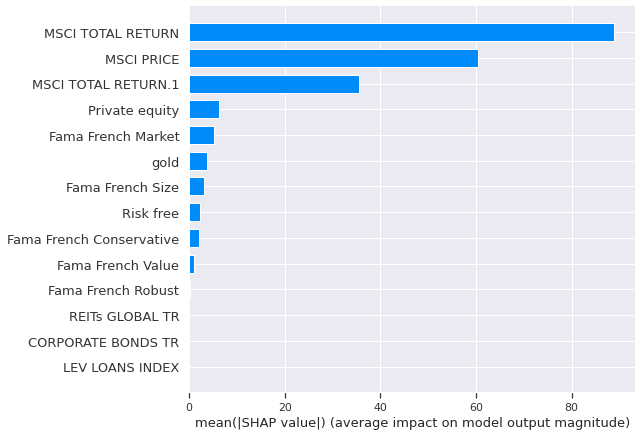

In [42]:
EMModel.explainable_nowcast(model_df, nowcast_pred_data, fc, specific_prediction_sample_to_explain=rownum-1, input_label_index_value=0, num_labels=colnum)

In [57]:
# low impact of REIT GLOBAL TR, CORPORATE BONDS TR an LEV LOANS INDEX could be a consequence of imputing those values
# try a reduced dataset 

df2=df.loc[130:]
df2.head(3)

,Date,Private equity,Private equity returns,MSCI PRICE,MSCI TOTAL RETURN,MSCI TOTAL RETURN.1,gold,LEV LOANS INDEX,CORPORATE BONDS TR,REITs GLOBAL TR,Fama French Market,Fama French Size,Fama French Value,Fama French Robust,Fama French Conservative,Risk free
130,2005-02-28,1970.576667,0.000890,1792.63,3678.646,3395.133,437.02,1537.088,176.453,1140.77,255.165236,136.850524,198.233123,199.090816,188.678285,185.305523
131,2005-03-31,1972.330000,0.000889,1760.89,3619.894,3330.635,427.65,1543.409,175.623,1111.06,250.138480,134.907247,202.296902,199.986725,191.112235,185.694665
132,2005-05-31,2056.783333,0.020744,1782.46,3670.690,3320.818,416.05,1542.413,179.571,1167.37,252.501626,133.152047,201.203902,199.948867,189.845629,186.531227


In [58]:
# recheck missing values
print("Missing information for whole dataset")
print("Missing by row", df2.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df2.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row Date                        0
Private equity              0
Private equity returns      0
MSCI PRICE                  0
MSCI TOTAL RETURN           0
MSCI TOTAL RETURN.1         0
gold                        0
LEV LOANS INDEX             0
CORPORATE BONDS TR          0
REITs GLOBAL TR             0
Fama French Market          0
Fama French Size            0
Fama French Value           0
Fama French Robust          0
Fama French Conservative    0
Risk free                   0
dtype: int64
Missing by col 130    0
131    0
132    0
133    0
134    0
      ..
268    0
269    0
270    0
271    0
272    0
Length: 143, dtype: int64


In [59]:
# get variables
model_df2, orig_df2 = Helper.get_variable(df2, ts, fc)

In [60]:
nowcast2_full_data, nowcast2_pred_data = EMModel.nowcast(model_df2, ts, fc, period=6, fq='1m', forecast_window=forecast_window, select_model=select_model)

                         Model Specification: Dynamic Factor Model                         
Model:                Dynamic Factor Model   # of observed variables:                    15
                   + 1 factors in 1 blocks   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                                  0   Standardize variables:                    True
                                     - 143                                                 
Observed variables / factor loadings
           Dep. variable          0
-----------------------------------
          Private equity          X
                   value          X
              MSCI PRICE          X
       MSCI TOTAL RETURN          X
     MSCI TOTAL RETURN.1          X
                    gold          X
         LEV LOANS INDEX          X
      CORPORATE BONDS TR          X
         REITs GLOBAL TR          X
      Fama Fren

In [62]:
nowcast2_pred_data[['value']]

,value
Date,
2021-10-31,0.019763
2021-11-30,0.022263
2021-12-31,0.024147
2022-01-31,0.025608
2022-02-28,0.026781
2022-03-31,0.027759


Epoch 1/30
5/5 [==============================] - 1s 4ms/step - loss: 5704.1514
Epoch 2/30
5/5 [==============================] - 0s 4ms/step - loss: 5087.4531
Epoch 3/30
5/5 [==============================] - 0s 4ms/step - loss: 4475.6621
Epoch 4/30
5/5 [==============================] - 0s 5ms/step - loss: 3871.5220
Epoch 5/30
5/5 [==============================] - 0s 4ms/step - loss: 3271.1597
Epoch 6/30
5/5 [==============================] - 0s 4ms/step - loss: 2674.5073
Epoch 7/30
5/5 [==============================] - 0s 4ms/step - loss: 2091.5376
Epoch 8/30
5/5 [==============================] - 0s 4ms/step - loss: 1505.1428
Epoch 9/30
5/5 [==============================] - 0s 4ms/step - loss: 916.3815
Epoch 10/30
5/5 [==============================] - 0s 6ms/step - loss: 403.7216
Epoch 11/30
5/5 [==============================] - 0s 6ms/step - loss: 270.9001
Epoch 12/30
5/5 [==============================] - 0s 4ms/step - loss: 381.3845
Epoch 13/30
5/5 [========================

  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: Private equity returns_0



Current Label Shown: Private equity returns_0



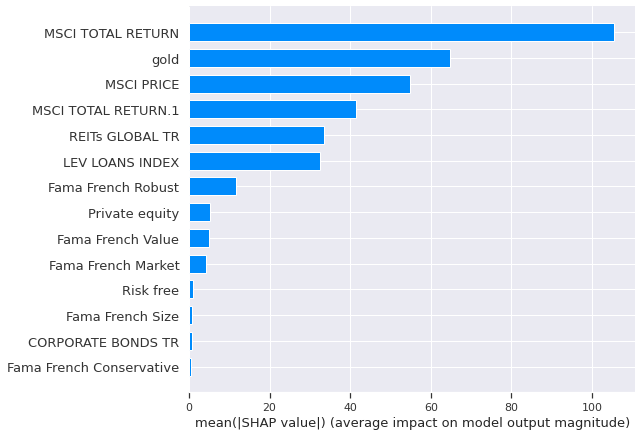

In [63]:
colnum2 = nowcast2_full_data.shape[1]
rownum2 = nowcast2_full_data.shape[0]
EMModel.explainable_nowcast(model_df2, nowcast2_pred_data, fc, specific_prediction_sample_to_explain=rownum2-1, input_label_index_value=0, num_labels=colnum2)